### **Road To ML: Course 5 - Extreme Gradient Boosting with XGBoost**

#### **Chap 1: Classification with XGBoost**

In [1]:
%reset
# Import necessary module
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb

##### **Classification Review:**

Supervised learning: relies on labeled data, have some understanding of past behavior.
- Classification:
    - i.e. Logistic Regression and Decision Tree
    - features (attributes or predictors) can be numeric or categorical
        - numeric features should be scaled (z-scored)
            - i.e. to ensure properly trained SVM
        - categorical features should be encoded (one-hot) 
    - binary output
        - i.e. will you buy our product? 
        - uses AUC (area under ROC curve) to judge the quality
            - higher AUC / larger area under ROC curve = better performing model\
            ![title](https://i.ibb.co/Y2GqLBk/auc-curve.jpg)
    - multiclass output
        - i.e. predict whether picture contains one of several species of birds
        - uses accuracy score (higher is better) and overall condusion etrix to judge the quality\
            ![title](https://i.ibb.co/rcyZG66/imconsufse.jpg)


In [2]:
# exercise 1

Which of these is a classification problem?\
A) Given past performance of stocks and various other financial data, predicting the exact price of a given stock (Google) tomorrow.\
B) Given a large dataset of user behaviors on a website, generating an informative segmentation of the users based on their behaviors.\
C) Predicting whether a given user will click on an ad given the ad content and metadata associated with the user.\
D) Given a user's past behavior on a video platform, presenting him/her with a series of recommended videos to watch next.

<b>*Answer: C*</b>

In [3]:
# exercise 2

Which of these is a binary classification problem?
A) Predicting whether a given image contains a cat.\
B) Predicting the emotional valence of a sentence (Valence can be positive, negative, or neutral).\
C) Recommending the most tax-efficient strategy for tax filing in an automated accounting system.\
D) Given a list of symptoms, generating a rank-ordered list of most likely diseases.

<b>*Answer: A*</b>

##### **Introducing XGBoost**

- it is an optimized gradient-boosting ML library
- excellent speed and performance
    - core algotithm is parallelizable, uses multi-core cpu, can use gpu, and across network of computers
    - outperform single-algorithms methods
    - state-of-the-art performance
- can train very large datasets (100 mill+)

In [4]:
# exercise 3: XGBoost: Fit/Predict

In [5]:
churn_data = pd.read_csv('datasets/churn_data.csv')

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123, learning_rate=0.1, eval_metric="error")

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\JIBJIB\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.750100


In [6]:
xg_cl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

##### **Decision tree**

- **Base leaner**: any individual learning algorithm in an ensemble algorithm
- **Decision tree**: tree-like graph to model either a continuous or categorical choice given some data
    - composed of a series of binary decisions (yes/no , true/false)
    - prediction happen at the "leaves" of the tree
    - Constructed iteratively (one decision at a time) until stopping citerion is met 
        - i.e. depth of tree max value
    - the tree is built one split at a time
        - split can be vary (where the feature's range of values)
            - but involves in choosing a split point that segregates the target values better until all values within a given split are exclusively of one category or another.
    - decision tree in general are low-bias high-variance model
        - very good at training data, poor on testing data --> overfit \
        ![title](https://i.ibb.co/fXVK7FV/deda.jpg)

**XGBoost uses CART (classification and regression tree)**
- each leaf always contains a real-valued score
- the score can be thresholded to convert into categories for classification problem

In [7]:
# exercise 4: Decision trees

In [8]:
# Cleaning data
df = pd.read_csv("datasets/breast_cancer.csv", header = 0)
df['diagnosis'] = df['diagnosis'].replace(['B','M'],[0,1])
y = df['diagnosis']
X = df.drop(['diagnosis','id','Unnamed: 32'], axis=1)

# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth = 4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9736842105263158


##### **What is Boosting?**

- concept that can be applied to a set of machine learning model ("meta-algorithm")
- ensemble meta-algorithm uses to reduce any given single learner's variance and convert many weak learners to strong learner
- Weak learner: ML algorithm that is slightly better than chance
    - i.e. Decision tree whose predictions are slightly better than 50%
- Strong learner: any algorithm that can be tuned to achieve good performance


**How does it work?**
1. literatively learning a set of weak models on subsets of data
2. weighing each weak prediction according to each weak learner's performance
3. combined all weak learners' predictions multiplied by their weights to obtain a single final weighted prediction\

Result: Much better than the individual predictions\
![title](https://i.ibb.co/mcHtQZB/imabos.jpg)

**Model evaluation through cross-validation**
- CV: estimating the performance of a model on unseen data
- generates many non-overlapping train test splits on training data
- reports the average test set performance across all data split

DMatrix = optimized data structure (efficienct gain)

In [9]:
# exercise 5: Measuring accuracy (linked with exercise 3)

In [10]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, # number of trees we want to build 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001845          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.75148


In [11]:
# exercise 6: Measuring AUC

In [12]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002820
1        0.790864       0.006758       0.789156      0.006847
2        0.815872       0.003899       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001938
0.8261913333333334


##### **When should I use XGBoost?**

- Having a large number of training examples
    - greater than 1000 training examples and less than 100 features
    - no. of features < no. of training samples
- have a mixture of categorical and numeric features
    - or just numeric features

##### **When should I not use XGBoost?**

- Problems that can be solve by deep learning
    - image recognition
    - computer vision
    - Natural Language Processing and understanding problems
- very small training set (<100 training examples)
- or when the number of training samples is smaller than the number of features

In [13]:
# exercise 7: Using XGBoost

Which one is the best use of XGBoost?\
A) Visualizing the similarity between stocks by comparing the time series of their historical prices relative to each other.\
B) Predicting whether a person will develop cancer using genetic data with millions of genes, 23 examples of genomes of people that didn't develop cancer, 3 genomes of people who wound up getting cancer.\
C) Clustering documents into topics based on the terms used in them.\
D) Predicting the likelihood that a given user will click an ad from a very large clickstream log with millions of users and their web interactions.

<b>*Answer: D*</b>

#### **Chap 2: Regression with XGBoost**

##### **Regression Review:**

- predicting continuous or real value
    - i.e. predicting height from physical attributes at birth
- metrics for judging quality: 
    - root mean squared error (RMSE)
        - $RMSE = \sqrt{\frac{\sum(actual-predict)^2}{N}}$
    - mean absolute error (MAE)
        - $\frac{\sum \mid actual-predict \mid}{N}$
        - not frequently used since it lacks some mathematical properties
- algorithm i.e.: Linear Regression and Decision Tree

*p.s. Decision tree can be use in both classification and regression*

*p.s2. Linear base learner is not commonly used. It does not compatible with sci-kit API and need to use XGBoost's own function i.e. xgb.train()*

In [14]:
# exercise 1

Which of these is a regression problem?\
A) Recommending a restaurant to a user given their past history of restaurant visits and reviews for a dining aggregator app.\
B) Predicting which of several thousand diseases a given person is most likely to have given their symptoms.\
C) Predicting which of several thousand diseases a given person is most likely to have given their symptoms.\
D) Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior history, etc.).

<b>*Answer: D*</b>

##### **Objective (loss) functions and base learners**

- quantifies how far off the prediction is from the actual result
- measure the difference between prediction and true values to a real number
- Goal: minimize the loss function for all data points in the model

**Loss function in XGBoost**
- Regression problems -> reg:linear (changed to reg:squarederror)
- Binary classification:
    - decision only -> reg:logistic
    - probability only -> binary:logistic

**Base learner:**
- Individual model = base learner
- Goal: have a learner that is slightly better than random guessing on certain training examples and uniformly bad remainder
    - So when all the predictions are combined, the uniformly bad predictions cancel out, and those slightly better than random guessing combine into a single very good prediction

In [15]:
# exercise 2: Decision trees as base learners

In [16]:
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv("datasets/ames.csv",header=0)
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators = 10, booster = 'gbtree', seed=123,
                          learning_rate = 0.1, max_depth = 3)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


In [17]:
# exercise 3: Linear base learners

In [18]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test =  xgb.DMatrix(data = X_test, label = y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(MSE(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 42265.189216


In [19]:
# exercise 4: Evaluating model quality

In [20]:
## RMSE

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.535156      429.451316   142980.433594    1193.791602
1    102832.542969      322.473304   104891.392578    1223.157623
2     75872.617188      266.469946    79478.939454    1601.341377
3     57245.650390      273.623926    62411.921875    2220.149857
4     44401.298828      316.423666    51348.281250    2963.378741
4    51348.28125
Name: test-rmse-mean, dtype: float64


In [21]:
## MAE

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480469     668.337982  127633.972657   2404.002681
1    89770.052735     456.957620   90122.501953   2107.912682
2    63580.790039     263.405712   64278.563477   1887.565119
3    45633.153321     151.884551   46819.166016   1459.819398
4    33587.093750      86.999137   35670.645508   1140.606558
4    35670.645508
Name: test-mae-mean, dtype: float64


##### **Regularization and base learners in XGBoost**

- Regularization is a control on model complexity
- We want models that are both accurate and as simple as possible
- Regularization perameters:
    - gamma - minimum loss reduction allowed for a split to occur. Higher gamma -> fewer splits
    - alpha - l1 regularization on leaf weights. Strong decrease. Higher alpha -> more regularization
    - lambda - l2 regularization on leaf weights. Smooth decrease. Higher lambda -> more regularization

**Conclusion:**
- Linear Base Learner:
    - linear regression & logistic regression (sum of linear learner)
    - when combined many of these base models into an ensemble, you get a weighted sum of linear models (linear)
    - don't get any nonlinear combination features -> rarely used
        - identical performance from a regularized linear model
- Tree Base Learner:
    - Decision Tree
    - when combined many of these base models into an ensemble, you get a weighted sum of decision trees (nonlinear)
    - almost exclusively used in XGBoost

**Python zip() function**
- creates a generator of parallel values
    - i.e. zip([1,2,3],['a','b','c']) = [1,'a'],[2,'b'],[3,'c']
- generators need to completely instantiated before they can be use
    - solution: use list() to instantiates the full generator
    
i.e. list(zip([1,2,3],['a','b','c']))


In [22]:
# exercise 5: Using regularization in XGBoost

In [23]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357422
1   10  57746.062500
2  100  76624.625001


In [24]:
# exercise 6: Visualizing individual XGBoost trees

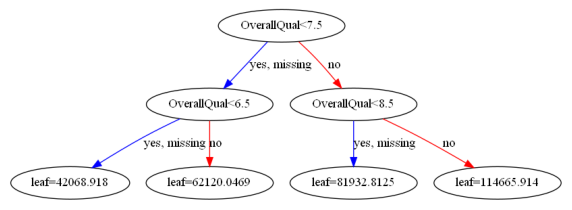

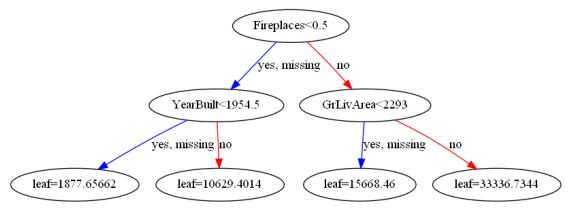

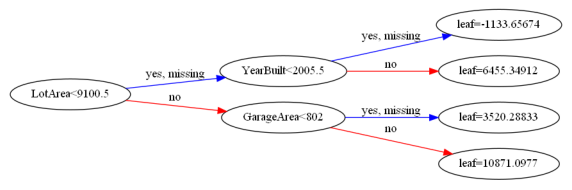

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Set up plot size
rcParams['figure.figsize'] = 10,5

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

In [26]:
# exercise 7: Visualizing feature importances: What features are most important in my dataset

# One simple way of doing this involves counting the number of times each feature is split on 
# across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph,
# with the features ordered according to how many times they appear.
# XGBoost has a plot_importance() function that allows you to do exactly this.

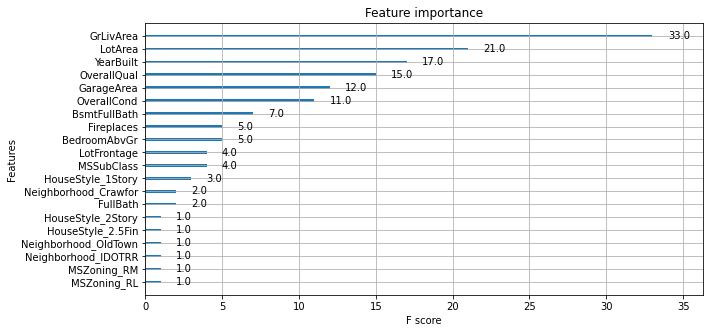

In [27]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

#### **Chap 3: Fine-tuning your XGBoost model**

##### **Why tune your model?**

Tuning the model reduce RMSE! 

In [28]:
# Untuned Model
untuned_params={"objective":"reg:squarederror"}
untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=untuned_params, nfold=4,
                                metrics="rmse",as_pandas=True,seed=123)

# Tuned Model
tuned_params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,
                'learning_rate': 0.1, 'max_depth': 5}
tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params,
                            nfold=4, num_boost_round=200, metrics="rmse",
                            as_pandas=True, seed=123)

print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 34624.229980
Tuned rmse: 29965.413086


In [29]:
# exercise 1: When is tuning your model a bad idea?

Given that model tuning can be time-intensive and complicated, which of the following scenarios would NOT call for careful tuning of your model?\
A) You have lots of examples from some dataset and very many features at your disposal.\
B) You are very short on time before you must push an initial model to production and have little data to train your model on.\
C) You have access to a multi-core (64 cores) server with lots of memory (200GB RAM) and no time constraints.\
D) You must squeeze out every last bit of performance out of your xgboost model.

<b>*Answer: B*</b>

In [30]:
# exercise 2: Tuning the number of boosting rounds

# Let's start with parameter tuning by seeing how the number of
# boosting rounds (number of trees you build) impacts the
# out-of-sample performance of your XGBoost model. 

In [31]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds,
                        metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.298177
1                   10  34774.192709
2                   15  32895.097656


In [32]:
# exercise 3: Automated boosting round selection using early_stopping

# Early stopping works by testing the XGBoost model after every boosting round
# against a hold-out dataset and stopping the creation of additional boosting rounds
# (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case)
# does not improve for a given number of rounds. 

In [33]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635417      403.636200   142640.656250     705.559400
1     103057.036459       73.769561   104907.666667     111.114933
2      75975.968750      253.729627    79262.057292     563.763447
3      57420.531250      521.656755    61620.135417    1087.693857
4      44552.955729      544.170190    50437.559896    1846.446535
5      35763.947917      681.797248    43035.661458    2034.469207
6      29861.463542      769.572072    38600.881510    2169.798065
7      25994.675781      756.521419    36071.817708    2109.795430
8      23306.836588      759.238254    34383.184896    1934.546688
9      21459.769531      745.624999    33509.141276    1887.375284
10     20148.721354      749.612769    32916.807943    1850.894476
11     19215.382813      641.387565    32197.833333    1734.456784
12     18627.389323      716.256794    31770.852865    1802.154800
13     17960.694661      557.043073    31482.782552    1779.12

##### **Overview of XGBoost's hyperparameters**

**Tunable parameters**
- Tree based learner:
    - **learning rate (eta)** - how quickly the model fits the residual error using additional base learners
        - low learning rate + high boosting round = high learning rate
        - high learning rate -> stronger regularization (penalizing feature weights more strongly)
    - **gamma** - min loss function to create new tree split
    - **lambda** - L2 regularization on leaf weights
    - **alpha** - L1 regularization on leaf weights
    - **max_depth** - how deeply each tree is allowed to grow during any given boosting round
    - **subsample** - fraction of total training set (samples) that can be used for any given boosting round
        - value must be in between 0 and 1
        - low subsample -> may underfit
        - high subsample -> may overfit
    - **colsample_bytree** - fraction of features that can be used for any given boosting round
        - value must be in between 0 and 1
        - small value -> few features can be used to build a tree 
            - aka. additional regularization (may cause underfit)
        - large value -> almost all features can be used to build a tree 
            - aka. few regularization (may cause overfit)

- Linear based learner:
    - **lambda** - L2 regularization on leaf weights
    - **alpha** - L1 regularization on leaf weights
    - **lambda_bias** - L2 regularization on bias


*p.s. The number of boosting rounds is tunable for both model types*

In [34]:
# exercise 4: Tuning eta (learning rate)

In [35]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, early_stopping_rounds=5,
                        num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.406250
1  0.010  179932.187500
2  0.100   79759.411459


In [36]:
# exercise 5: Tuning max_depth

In [37]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params = params, nfold=2, num_boost_round=10,
                        early_stopping_rounds=5,metrics="rmse",as_pandas=True,seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.468750
1          5  35596.599610
2         10  36065.548829
3         20  36739.578125


In [38]:
# exercise 6: Tuning colsample_bytree

In [39]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  40918.117188
1               0.5  35813.906250
2               0.8  35995.677735
3               1.0  35836.042969


##### **Grid search and random search**

**Review:**
- Strategies to choose several hyperparameter values simultaneously:
    - Grid Search
    - Random Search

**Grid Search:**
- Search exhaustively over a given set of hyperparameters, once per set of hyperparameters
- number of models = no. of testing value multiply together
    - i.e. {'learning_rate': [0.01,0.5,0.9], 'subsample': [0.3,0.5,0.7,0.9]} --> 3*4 = 12 models
- pick final model hyperparameter values that give best cross-validated evaluation metric value

**Random Search:**
- Create a range of hyperparameter values per hyperparameter that you want to search over
- User can decide the number of models or iterations
- In each iteration, the algorithm will randomly draw a value in the range of specified values for each hyperparameter searched over, and then train+evaluate model with those hyperparameters
- Select the best evaluated score when the maximum hyperparameter is reached


In [40]:
# exercise 7: Grid search with XGBoost

In [41]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid,
                        scoring = "neg_mean_squared_error", cv = 4, verbose = 1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  28986.18703093561


In [42]:
# exercise 8: Random search with XGBoost

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions = gbm_param_grid,
                                    scoring = "neg_mean_squared_error", n_iter = 5, cv = 4, verbose = 1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


##### **Limitations**
**Grid Search**
- more number of hyperparameters, more time it takes to compute

**Random Search**
- parameter space to explore can be massive
    - you need to hope that it will randomly select the best result
        - can be soloved by increasing the number of iteration, but again, it will be slow

In [44]:
# exercise 9: When to use grid search and random search?

Which of the following most accurately describes why both random search and grid search are non-ideal search hyperparameter tuning strategies in all scenarios?\
A) Grid Search and Random Search both take a very long time to perform, regardless of the number of parameters you want to tune.\
B) Grid Search and Random Search both scale exponentially in the number of hyperparameters you want to tune.\
C) The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of hyperparameters has a significant effect on how long it takes to run.\
D) Grid Search and Random Search require that you have some idea of where the ideal values for hyperparameters reside.

<b>*Answer: C*</b>

#### **Chap 4: Using XGBoost in pipelines**

##### **Review**

- take a list of named tuples as input
- can contain any scikit-learn estimator and transformer object
- list are excuted in an order
- implements fit/predict method
- can be use as an input estimator into grid/randomized search and cross_val_score method

##### **Additional Preprocessing**
**Approach 1: LabelEncoder with OneHotEncoder**
- LabelEncoder - converts a categorical column of strings into integers
- OneHotEncoder - takes the column of integers and encodes them as dummy variables

but they cant be done within a pipeline

**Approach 2: Dict Vectorizer**
- can accomplish steps in **Approach 1** using pipeline
- it converts lists of feature mapping into vectors
- but need to convert Pandas DataFrame into a list of dictinary entries
- traditionally used in text processing

In [45]:
# exercise 1: Exploratory data analysis

Pick the option that is incorrect\
A) The DataFrame has 21 columns and 1460 rows.\
B) The mean of the LotArea column is 10516.828082.\
C) The DataFrame has missing values.\
D) The LotFrontage column has no missing values and its entries are of type float64.\
E) The standard deviation of SalePrice is 79442.502883.

<b>*Answer: D*</b>

In [46]:
df = pd.read_csv("datasets/ames_unprocessed.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [47]:
# data exploration
print("Shape:",df.shape)
print("LotArea Mean:",df['LotArea'].mean())
print("SalePrice SD:",df['SalePrice'].std())
print("Missing value:\n",df.isna().sum())
# print(df.dtypes)

Shape: (1460, 21)
LotArea Mean: 10516.828082191782
SalePrice SD: 79442.50288288662
Missing value:
 MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
Remodeled         0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
Fireplaces        0
GarageArea        0
PavedDrive        0
SalePrice         0
dtype: int64


In [48]:
# exercise 2: Encoding categorical columns I: LabelEncoder

In [49]:
df.LotFrontage.shape

(1460,)

In [50]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print("-----------------------------------------------------------------")
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
-----------------------------------------------------------------
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In [51]:
# exercise 3: Encoding categorical columns II: OneHotEncoder
# Order between entries

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df = pd.read_csv('datasets/ames_unprocessed.csv')

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical columns names
categorical_columns = df.columns[categorical_mask].tolist()

# Generate unique list of each categorical columns
unique_list = [df[c].unique().tolist() for c in categorical_columns]

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categories=unique_list)

# Create preprocess object for onehotencoding
preprocess = make_column_transformer(
    (ohe, categorical_columns),
    ('passthrough', categorical_mask[~categorical_mask].index.tolist())
)

# apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = preprocess.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape fo the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

In [53]:
# exercise 3: Encoding categorical columns III: DictVectorizer
# The two step process we just went through - LabelEncoder followed by OneHotEncoder
# can be simplified by using a DictVectorizer.

In [54]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

In [55]:
# exercise 4: Preprocessing within a pipeline

In [56]:
df = pd.read_csv('datasets/ames_unprocessed.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [57]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"),y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

##### **Incorporating XGBoost into pipelines**

- just use XGBoost's scikit learn api within a pipeline object

**Additional libraries for pipeline:**
- `sklearn_pandas`:
    - `DataFrameMapper` - Interoperability (easy conversion) between `pandas` and `scikit-learn`
    - `CategoricalImputer` - Allow for imputation of categorical variables before conversion to integers
- `sklearn.preprocessing`:
    - `Imputer` - fill in missing numerical values
- `sklearn.pipeline`:
    - `FeatureUnion` - combine separate outputs into a single pipeline output

In [58]:
# exercise 5: Cross-validating your XGBoost model

In [59]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps=steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X.to_dict("records"),y,scoring="neg_mean_squared_error",cv=10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  27683.04157118635


In [60]:
# exercise 6: Kidney disease case study I: Categorical Imputer

In [61]:
X = pd.read_csv('datasets/chronic_kidney_X.csv')
y = pd.read_csv('datasets/chronic_kidney_y.csv').to_numpy().ravel()

In [74]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [75]:
# exercise 7: Kidney disease case study II: Feature Union

In [80]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

In [77]:
# exercise 8: Kidney disease case study III: Full pipeline

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [85]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  0.998237712755785


##### **Tuning XGBoost hyperparameters**

- just use `RandomizedSearchCV`

In [87]:
# exercise 9: Bringing it all together

In [86]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,param_distributions=gbm_param_grid,n_iter=2,scoring='roc_auc',verbose=1,cv=2)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print("Best rmse: ", np.sqrt(np.abs(randomized_roc_auc.best_score_)))
print("Best model: ", randomized_roc_auc.best_estimator_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best rmse:  0.9984521353909093
Best model:  Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('num_mapper',
                                                 DataFrameMapper(df_out=True,
                                                                 features=[(['age'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['bp'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['sg'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['al'],
                                                     